Importing Libraries and uploading all the genome files

In [ ]:
import numpy as np
import os
import heapq
import math
from heapq import heappop, heappush
from google.colab import files
uploaded = files.upload()
#data = np.loadtxt(filename, dtype=str)
#data = np.loadtxt('HoSa.txt', dtype=str)

Saving HaHi to HaHi
Saving HePy to HePy
Saving AeCa to AeCa
Saving YeMi to YeMi
Saving AgPh to AgPh
Saving BuEb to BuEb


Making a Directory and calculating the frequency of each symbol

In [ ]:
os.chdir('/content/data corpus')
cwd=os.getcwd()
print(cwd)

p={'A':0, 'T':0, 'G':0, 'C':0, 'n':0} #{A, T, G, C, eof}

for entry in os.scandir(cwd):
 HuffmanProbabilty(entry.path)
p1= sorted(p.items(), key =lambda kv:(kv[1], kv[0]), reverse= True)
print(p1)

/content/data corpus
{'A': 5964, 'T': 5020, 'G': 3632, 'C': 4324, 'n': 1}
/content/data corpus/BuEb 18941
{'A': 18181, 'T': 18111, 'G': 12413, 'C': 14205, 'n': 2}
/content/data corpus/AgPh 62912
{'A': 44687, 'T': 43454, 'G': 23319, 'C': 25139, 'n': 3}
/content/data corpus/YeMi 136602
{'A': 550084, 'T': 557529, 'G': 344592, 'C': 352219, 'n': 4}
/content/data corpus/HePy 1804428
{'A': 1279021, 'T': 1289108, 'G': 1558369, 'C': 1567931, 'n': 5}
/content/data corpus/HaHi 5694434
{'A': 1623606, 'T': 1633397, 'G': 2007934, 'C': 2020541, 'n': 6}
/content/data corpus/AeCa 7285484
[('C', 2020541), ('G', 2007934), ('T', 1633397), ('A', 1623606), ('n', 6)]


In [ ]:
tot=0
for i in p:
  tot=tot+ p[i]
print("Total number of symbols:",tot)

Total number of symbols: 7285484


**Huffman Coding**

In [ ]:
def HuffmanProbabilty(path):
  aeca= open(path, "r")
  while 1:
    str=aeca.read(1)
    if not str:
        p['n']=p['n']+1
        break
    p[str]=p[str]+1

  print(p)
  tot=0
  for i in p:
    tot=tot+ p[i]
  print(entry.path,tot)

  aeca.close()

In [ ]:
class HuffmanCode:
    def __init__(self,probability):
        self.probability = probability

    def position(self, value, index):
        for j in range(len(self.probability)):
            if(value >= self.probability[j]):
                return j
        return index-1

    def characteristics_huffman_code(self, code):
        length_of_code = [len(k) for k in code]

        mean_length = sum([a*b for a, b in zip(length_of_code, self.probability)])

        print("Average length of the code: %f" % mean_length)
        print("Efficiency of the code: %f" % (entropy_of_code/mean_length))
        print("Redundancy of the code: %f" %(mean_length-entropy_of_code))

    def compute_code(self):
        num = len(self.probability)
        huffman_code = ['']*num

        for i in range(num-2):
            val = self.probability[num-i-1] + self.probability[num-i-2]
            if(huffman_code[num-i-1] != '' and huffman_code[num-i-2] != ''):
                huffman_code[-1] = ['1' + symbol for symbol in huffman_code[-1]]
                huffman_code[-2] = ['0' + symbol for symbol in huffman_code[-2]]
            elif(huffman_code[num-i-1] != ''):
                huffman_code[num-i-2] = '0'
                huffman_code[-1] = ['1' + symbol for symbol in huffman_code[-1]]
            elif(huffman_code[num-i-2] != ''):
                huffman_code[num-i-1] = '1'
                huffman_code[-2] = ['0' + symbol for symbol in huffman_code[-2]]
            else:
                huffman_code[num-i-1] = '1'
                huffman_code[num-i-2] = '0'

            position = self.position(val, i)
            probability = self.probability[0:(len(self.probability) - 2)]
            probability.insert(position, val)
            if(isinstance(huffman_code[num-i-2], list) and isinstance(huffman_code[num-i-1], list)):
                complete_code = huffman_code[num-i-1] + huffman_code[num-i-2]
            elif(isinstance(huffman_code[num-i-2], list)):
                complete_code = huffman_code[num-i-2] + [huffman_code[num-i-1]]
            elif(isinstance(huffman_code[num-i-1], list)):
                complete_code = huffman_code[num-i-1] + [huffman_code[num-i-2]]
            else:
                complete_code = [huffman_code[num-i-2], huffman_code[num-i-1]]

            huffman_code = huffman_code[0:(len(huffman_code)-2)]
            huffman_code.insert(position, complete_code)

        huffman_code[0] = ['0' + symbol for symbol in huffman_code[0]]
        huffman_code[1] = ['1' + symbol for symbol in huffman_code[1]]

        if(len(huffman_code[1]) == 0):
            huffman_code[1] = '1'

        count = 0
        final_code = ['']*num

        for i in range(2):
            for j in range(len(huffman_code[i])):
                final_code[count] = huffman_code[i][j]
                count += 1

        final_code = sorted(final_code, key=len)
        return final_code

In [ ]:
prob= [float("{:.10f}".format(p[i]/tot)) for i in p]
print(prob)
P= sorted(prob, reverse=True)

entropy_of_code=0.00000000
for i in prob:
    entropy_of_code=entropy_of_code-(i*math.log(i, 2))

# print('Entropy of the code: ',entropy_of_code)

huffmanClassObject = HuffmanCode(P)
huffman_code = huffmanClassObject.compute_code()

print(' Char | Huffman code ')
print('----------------------')

for id,char in enumerate(p1):
    if huffman_code[id]=='':
        print(' %-4r |%12s' % (char[0], 1))
        continue
    print(' %-4r |%12s' % (char[0], huffman_code[id]))

# print(huffman_code)
print('Entropy of the code: ',entropy_of_code)
huffmanClassObject.characteristics_huffman_code(huffman_code)

[0.2228549263, 0.2241988315, 0.2756074957, 0.2773379229, 8.236e-07]
 Char | Huffman code 
----------------------
 'C'  |          00
 'G'  |          01
 'T'  |          10
 'A'  |         110
 'n'  |         111
Entropy of the code:  1.991905674289159
Average length of the code: 2.222856
Efficiency of the code: 0.896102
Redundancy of the code: 0.230950


In [ ]:
#for fixed length code
print('Entropy of the code: ',entropy_of_code)
print('Average length of the code: ',3)
print('Efficiency of the code: ', (entropy_of_code/3) )
print("Redundancy of the code: " ,(3-entropy_of_code))

Entropy of the code:  1.991905674289159
Average length of the code:  3
Efficiency of the code:  0.6639685580963863
Redundancy of the code:  1.008094325710841


In [ ]:
code={}
for id, char in enumerate(p1):
    if huffman_code[id]=='':
        code[char[0]]=1
        continue
    code[char[0]]=huffman_code[id]

print(code)

{'C': '00', 'G': '01', 'T': '10', 'A': '110', 'n': '111'}


Creating a new huffman encoded file consisting of all the species corpus

In [ ]:
filew= open('/content/Encoded', 'w')
for entry in os.scandir(cwd):
  filer= open(entry.path, 'r')
  while 1:
    str=filer.read(1)
    if not str:
        filew.write(code['n'])
        filew.write('/')
        break
    filew.write(code[str])
    filew.write('/')
  filer.close()

filew.close()

Display the encoded file

In [ ]:
with open('/content/Encoded', 'rb') as f:
    print(f.read(100))

b'00/01/01/110/00/110/00/110/00/110/110/110/110/110/01/110/110/10/01/110/110/01/01/110/10/10/10/10/01/'


In [ ]:
size = os.path.getsize('/content/Encoded') 
print('Size of file is', size, 'bytes')

Size of file is 23480064 bytes


**Fixed Length Coding**

In [ ]:
#do not run!
f1 = open('bi.txt', 'wb')
d = {'A':'111', 'T':'001', 'G':'011', 'C':'100', 'n':'000'}

for entry in os.scandir(cwd):
  f= open(entry.path, 'r')
  while 1:     
    c = f.read(1)         
    if not c:
        f1.write(int(d['n'], 2).to_bytes((len(d['n']) + 7) // 8, 'big'))
        break
    res = int(d[c],2).to_bytes((len(d[c])+7)//8, 'big')
    f1.write(res)
    f.close()    
f1.close()

Converting text file into array

In [ ]:
encod= open('/content/Encoded', 'rb')
dat = encod.read()
leng = len(dat)
encod.close()
print(leng)

23480064


In [ ]:
import pandas as pd
data = pd.read_csv('/content/Encoded', header=None, delimiter = '/')
data.columns = [x for x in range(tot+1)]
#data.columns = ['code']
data.to_csv('encoder.csv', index = None)
dataset = pd.read_csv('encoder.csv')
dataset.head()
dat = dataset.dropna(axis='columns')

In [ ]:
Labels=np.array(dat)


In [ ]:
print(np.shape(Labels))

(1, 7285484)


Adding Zero padding and reshaping the the array

In [ ]:
padded = np.zeros((1,16))
for i in padded:
  Label = np.append(Labels, i)
Label = Label.reshape(40475,180)
print(np.shape(Label))
Label = Label/111

(40475, 180)


**Autoencoder**

In [ ]:
import math
import numpy as np
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras import layers
from keras.layers import Dense
from keras import optimizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
X_train,X_test=train_test_split(Label,test_size=0.2,random_state=20)
k=math.floor((2/9)*X_train.shape[1])

In [ ]:
o1 = 180

In [ ]:
def autoencoder(X_train,hparam):
    model = Sequential()
# adding input layer
    input_shape=(X_train.shape[1],)
    model.add(Dense(o1, activation='relu', input_shape=input_shape))
# encoder part
    model.add(Dense(160, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(Dense(140, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(Dense(120, activation='relu'))
    model.add(layers.BatchNormalization())
# compressed layer
    complay = model.add(Dense(100, activation='relu'))
# decoder part
    model.add(layers.BatchNormalization())
    model.add(Dense(120, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(Dense(140, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(Dense(160, activation='relu'))
    model.add(Dense(o1, activation='sigmoid'))

    opt = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=opt, loss="binary_crossentropy")
    model.summary()
    trainer=model.fit(X_train, X_train, epochs=hparam.epoch, batch_size=hparam.batch, shuffle=True, validation_split=hparam.eval_split)
    
    plt.plot(trainer.history['loss'])
    plt.plot(trainer.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'val'], loc='upper left')
    plt.show()

    return model

In [ ]:
class hparam_config():
      def __init__(self, epoch,batch,eval_split):
        self.epoch=epoch
        self.batch=batch
        self.eval_split=eval_split

param_list=hparam_config(epoch=50,batch=40,eval_split=0.2)

In [ ]:
import matplotlib.pyplot as plt

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 180)               32580     
                                                                 
 dense_41 (Dense)            (None, 160)               28960     
                                                                 
 batch_normalization_28 (Bat  (None, 160)              640       
 chNormalization)                                                
                                                                 
 dense_42 (Dense)            (None, 140)               22540     
                                                                 
 batch_normalization_29 (Bat  (None, 140)              560       
 chNormalization)                                                
                                                                 
 dense_43 (Dense)            (None, 120)              

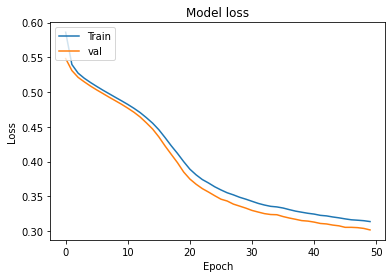

In [ ]:
encod=autoencoder(X_train, param_list)

In [ ]:
X_pred = encod.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(X_test,X_pred))

0.5922720267413412


In [ ]:
# Run only for improved models...........
from keras.models import save_model
encod.save('Autoencoder.h5')